# What will happen if we collapse a qubit in entangled pair?

### Step by step. For just a simple superposed pair

In [29]:
import numpy as np

# equal superposition
qubit0 = np.array([[0.5 ** 0.5, 0.5 ** 0.5]]).T

# non-equal
qubit1 = np.array([[0.6, 0.8j]]).T

statevector = np.kron(qubit0, qubit1)
print(statevector)

print()

for i in range(4):
    print(f" + {statevector[i, 0]:.2}|{i:02b}>", end='')

[[0.42426407+0.j        ]
 [0.        +0.56568542j]
 [0.42426407+0.j        ]
 [0.        +0.56568542j]]

 + (0.42+0j)|00> + 0.57j|01> + (0.42+0j)|10> + 0.57j|11>

### What is the probability to observe $|11\rangle$?

In [10]:
state = np.array([[0, 0, 0, 1]]).T


# TODO write the code to find a probability
prob = ...

assert (abs(qubit0[1]) ** 2) * (abs(qubit1[1]) ** 2) == prob, "Model return other value!"

Can we observe this easier? Yes, in [matrix form](https://en.wikipedia.org/wiki/Matrix_mechanics)! This is called [density matrix](https://en.wikipedia.org/wiki/Density_matrix).

Matrix representation can be observed as $|\psi\rangle\langle\psi|$, and diagonal elements are probability of observed states.

Obtain this matrix using the definition:

In [33]:
densitymatrix = statevector @ statevector.T.conj()
print(densitymatrix)
print(f"\nprob of |11> id {densitymatrix[0b11, 0b11]}")

[[0.18+0.j   0.  -0.24j 0.18+0.j   0.  -0.24j]
 [0.  +0.24j 0.32+0.j   0.  +0.24j 0.32+0.j  ]
 [0.18+0.j   0.  -0.24j 0.18+0.j   0.  -0.24j]
 [0.  +0.24j 0.32+0.j   0.  +0.24j 0.32+0.j  ]]

prob of |11> id (0.3200000000000001+0j)


What is a probabilty to mesure a single qubit without respect to the other?

[Theory says](https://edu.itp.phys.ethz.ch/hs14/QIT/Solutions3.pdf) to find density matrix of one qubit we should compute $\rho_A = Tr_B(\rho_{AB})=\sum_{k=1}^{n}\langle k_B|\rho_{AB}|k_B\rangle = \langle 0_B | \rho_{AB} |0_B \rangle + \langle 1_B | \rho_{AB} | 1_B\rangle$

### But what is we MEASURE a single qubit?

This is addressed in [stackexchange answer](https://quantumcomputing.stackexchange.com/questions/1206/how-does-measurement-of-one-qubit-affect-the-others).

$r(\langle0|\otimes I)\times(a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle)$.

Then:
$r(a\langle0|0\rangle\otimes|0\rangle+b\langle0|0\rangle\otimes|1\rangle+c\langle0|1\rangle\otimes|0\rangle+d\langle0|1\rangle\otimes|1\rangle)$.

Thus remains in a superposition.

$r(a|0\rangle+b|1\rangle)=\frac{1}{\sqrt{|a|^2+|b|^2}}(a|0\rangle+b|1\rangle)$

How it apply to our example?

In [133]:
for v in ([[1, 0]], [[0, 1]]):
    operation = np.kron(np.array(v), np.eye(2))
    mult = operation @ statevector

    #TODO apply normalization!
    norm = ...
    mult /= norm

    print(mult)

[[0.6+0.j ]
 [0. +0.8j]]
[[0.6+0.j ]
 [0. +0.8j]]


When measuring in either state, this does not affect the probabilities of the other qubit.

# But when entangled, it does

As soon as you measure one, the numbers corresoponding to probabilities of the other CHANGE!

This is entangled, but not pure state.

Observe how measurement of first qubit in either 0 or 1 influences probabilities of second qubit.

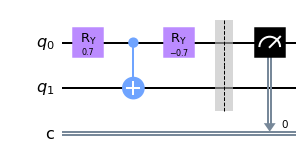

State vector:  [0.99123926 0.         0.13207847 0.        ]
State vector:  [0.99123926 0.         0.13207847 0.        ]
State vector:  [0.99123926 0.         0.13207847 0.        ]
State vector:  [0.         0.70710678 0.         0.70710678]
State vector:  [0.         0.70710678 0.         0.70710678]
State vector:  [0.99123926 0.         0.13207847 0.        ]
State vector:  [0.99123926 0.         0.13207847 0.        ]
State vector:  [0.99123926 0.         0.13207847 0.        ]
State vector:  [0.         0.70710678 0.         0.70710678]
State vector:  [0.99123926 0.         0.13207847 0.        ]


In [134]:
### Let's do it to an interesting superposition
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

import math
import matplotlib.pyplot as plt

qr = QuantumRegister(2, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

qc.ry(.7, 0)
qc.cx(0, 1)
qc.ry(-.7, 0)

qc.barrier()

qc.measure(0, 0)

qc.draw(output='mpl')
plt.show()

for i in range(10):
    job = execute(qc, Aer.get_backend('statevector_simulator'))
    result = job.result()
    sv = result.get_statevector(qc)
    print("State vector: ", abs(sv))

TODO: express this result on the whiteboard